# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`

In [1]:
! git clone https://github.com/tkj9ep/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 71 (delta 25), reused 14 (delta 10), pack-reused 36
Receiving objects: 100% (71/71), 6.30 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (30/30), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

The paper is proposing a framework for data cleaning called data tidying which allow ease of manipulation, model, and visualize. The framework that the paper suggests is that each variable is a column, each observation is a row, and each type of observatonal unit is a table.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The "tidy data standard" aims to make data cleaning easier by facilitating initial exploration and analysis of data. In other words, it creates a framework that makes analysis easier.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

Because all tidy datasets must adhere to similar protocols and rules, this makes all tidy datasets all the same in terms of formatting since they are standardized. In addition, tidy datasets tend to cleanly link structure with semantics. However, there is no uniform messy dataset but rather datasets that have are messy in various ways. One may have strings for a category meant for integers, while the other may have missing values, while another has weird values and so on and so forth.

What is meant by the second statement is that variables names can be unclear about what the variables actually refer to. In other words, the name of the variables and observations should be carefully chosen based on the context of the analysis. For example, processing speed and number of cores makes sense for a dataset of computer but just speed and number of cores may not make sense since speed can often be thought as how fast it loads things.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values are either the raw number or string that belongs to a variable and an observations. Variables contain all values and measure the underlying attribute across units. An observation contains all values measured on the same unit.

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is a standard way of mapping the meaning of a dataset to its structure. The section defines tidy data as data such that each variable forms a column, each observation forms a row, and each type of obserational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The five most common problems with messy datasets include column headers as values, multiple variables stored in one column, variables stored in both rows and columns, multiple types of observations units are stored in the same table, and a single observational unit is stored in multiple tables. The dataset is messy because the column headers are values (quantitive values) as opposed to the variable name that we are interested in (income).  Melting means to stack the dataset or in other words convert columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because it stores variables in both rows and columns. More specifically, the column variables are id, year, and month where each row variables are day, d1-d31 and across rows minimum/maximum temperature. Table 12 is tidy and molten because each row represents a meteorological measurement for a single day and have two measured variables. In addition, the element column contains the names of variables and drops any missing values.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The problem as stated by Wickham is that tidy data is dependent on the tools used yet the tidy tools will be linked to tidy data. In other words, since they are very dependent on each other, it is difficult to make the tidy tools if you don't have a tidy data to link it to. Wickham hopes that in the future that others will build upon the tidy data framework and develop better storage strategies and tools.


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Part 1**

In [ ]:
# 1: Price variable
import numpy as np
import pandas as pd

airbnb_data = pd.read_csv("./wrangling/assignment/data/airbnb_hw.csv", low_memory = False)

In [ ]:
print(airbnb_data.shape, "\n")
print(airbnb_data.dtypes, "\n")
print(airbnb_data.columns[1: 5], "\n")

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Since', 'Name', 'Neighbourhood ', 'Property Type'], dtype='object') 



In [ ]:
airbnb_data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
airbnb_data["Airbnb_Price"] = airbnb_data["Price"]

In [ ]:
airbnb_data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Airbnb_Price
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,199
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,549


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

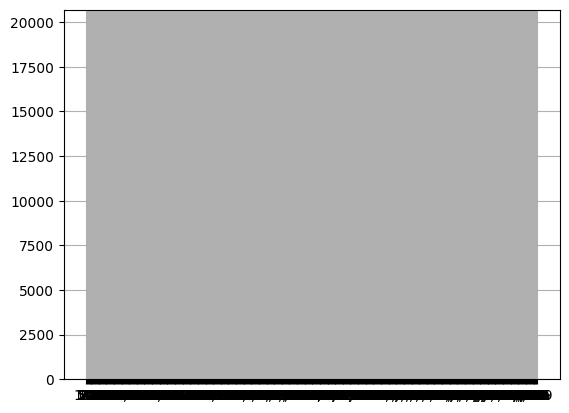

In [ ]:
var_of_interest = "Airbnb_Price"

print(airbnb_data[var_of_interest].unique(), "\n")
print(airbnb_data[var_of_interest].value_counts(), "\n")
print(airbnb_data[var_of_interest].hist(), "\n")

In [ ]:
print(type(airbnb_data[var_of_interest].iloc[0]))

<class 'str'>


In [ ]:
airbnb_data["Airbnb_Price"] = airbnb_data["Price"].apply(lambda x : x.replace(",", ""))
airbnb_data["Airbnb_Price"] = airbnb_data['Airbnb_Price'].apply(lambda x : int(x))

I decided to essentially remove all the commas and cast the values into integers. I did this because for the price, it makes sense for the data type to be integers as opposed to strings. However, due to the commas present for values greater than 999, it essentially "forces" the value the rest of the values to be strings which does not really make sense for that particular context.

In [ ]:
airbnb_data[var_of_interest].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [ ]:
print("Number of missing values:", airbnb_data[var_of_interest].isnull().sum())

Number of missing values: 0


**Part 2**

In [ ]:
shark_data = pd.read_csv("./wrangling/data/sharks.csv", low_memory = False)

In [ ]:
shark_data.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64

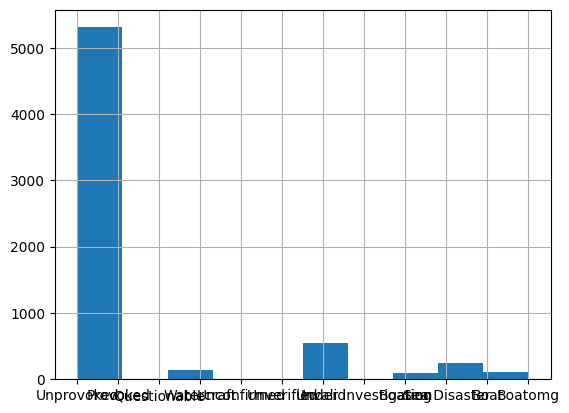

In [ ]:
shark_data["Type"].unique()
shark_data["Type"].hist()
shark_data["Type"].value_counts()

In [ ]:
# generalize labels to only provoked, unprovoked, watercraft, Sea Disaster, and unknown
def generalize_shark_type_labels(str_val):

  if str_val == "Invalid" or str_val == "Questionable" or str_val == "Unconfirmed" or str_val == "Unverified" or str_val == "Under Investigation":
    return "Unknown"

  elif str_val == "Boat" or str_val == "Boating" or str_val == "Boatomg" or str_val == "Under investigation":
    return "Watercraft"

  else:
    return str_val

In [ ]:
shark_data["Situation Type"] = shark_data["Type"].apply(lambda x: generalize_shark_type_labels(x))
shark_data["Situation Type"] = shark_data["Situation Type"].fillna("Unknown")

In [ ]:
shark_data.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Situation Type
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provoked
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked


In [ ]:
shark_data["Situation Type"].unique()

array(['Unprovoked', 'Provoked', 'Unknown', 'Watercraft', 'Sea Disaster'],
      dtype=object)

I chose to generalize all the Type values into just five categories: Provoked, Unprovoked, Sea Disaster, Watercraft, and Unknown. I chose to do it this way because most of the extra values in the Type were either typos or essentially similar synonyms of each other. I also set $nan$ values to be Unknown since if the value is empty, we technically don't know about it.

**Part 3**

In [ ]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'

trial_data = pd.read_csv(url, low_memory = False)

In [ ]:
col_of_interest = "WhetherDefendantWasReleasedPretrial"

trial_data.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [ ]:
trial_data[col_of_interest].head()

0    9
1    0
2    0
3    0
4    1
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [ ]:
trial_data[col_of_interest].unique()

array([9, 0, 1])

In [ ]:
trial_data[col_of_interest].value_counts()

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [ ]:
trial_data[col_of_interest] = trial_data[col_of_interest].replace(9, np.nan, inplace = False)
trial_data[col_of_interest].value_counts()

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

According to the codebook, the code value $9$ denotes unclear. Therefore, it made sense that the value $9$ was the number to replace with np.nan.

**Part 4**

In [ ]:
col_of_interest = "ImposedSentenceAllChargeInContactEvent"
sec_col_of_interest = "SentenceTypeAllChargesAtConvictionInContactEvent"

In [ ]:
trial_data[col_of_interest].value_counts()

                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 484, dtype: int64

In [ ]:
trial_data[sec_col_of_interest].value_counts()

4    8779
0    8720
1    4299
2     914
9     274
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64

In [ ]:
trial_data[col_of_interest].unique()

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [ ]:
trial_data[sec_col_of_interest].unique()

array([9, 0, 1, 4, 2])

In [ ]:
trial_data["Total Imposed Sentence"] = trial_data[col_of_interest].apply(lambda x : 0 if x == " " else x)
trial_data["Total Imposed Sentence"] = trial_data["Total Imposed Sentence"].apply(lambda x : float(x))

In [ ]:
trial_data["Total Imposed Sentence"].unique()

array([0.00000000e+00, 6.00000000e+01, 1.20000000e+01, 9.85626283e-01,
       3.60000000e+01, 6.00000000e+00, 2.40000000e+01, 5.91375770e+00,
       1.20000000e+02, 7.20000000e+01, 1.19917864e+01, 2.95687885e+00,
       8.40000000e+01, 1.08000000e+02, 3.00000000e+02, 2.40000000e+02,
       1.80000000e+02, 4.00000000e+00, 9.60000000e+01, 2.00000000e+00,
       5.40000000e+01, 3.28542094e-01, 4.40000000e+01, 5.00000000e+00,
       1.15000000e+02, 1.32000000e+02, 4.80000000e+01, 2.58000000e+02,
       3.40000000e+01, 7.60000000e+01, 1.64271047e-01, 1.31416838e-01,
       1.11000000e+02, 9.00000000e+00, 3.00000000e+00, 1.97125257e+00,
       3.69856263e+01, 6.57084189e-02, 3.54928131e+01, 1.06492813e+02,
       8.00000000e+00, 3.50000000e+01, 1.83141684e+01, 4.80000000e+02,
       3.20000000e+01, 9.30000000e+01, 2.34000000e+02, 7.32000000e+02,
       1.16427105e+00, 4.65708419e+00, 2.10000000e+01, 7.00000000e+00,
       4.49281314e+00, 1.80000000e+01, 6.00000000e+02, 4.31642710e+01,
      

I essentially removed all empty strings and set them to be $0$ because I am assuming that the criminal had $0$ sentence term since it did not seem to be recorded. In addition, I converted all values into floating point values.  

In [ ]:
trial_data_modify = trial_data.loc[: , ["Total Imposed Sentence", sec_col_of_interest]]

In [ ]:
trial_data_modify.head()

,Total Imposed Sentence,SentenceTypeAllChargesAtConvictionInContactEvent
0,0.000000,9
1,60.000000,0
2,12.000000,1
3,0.985626,1
4,0.000000,4


In [ ]:
time_nan = trial_data["Total Imposed Sentence"].isnull()
print(pd.crosstab(time_nan, trial_data[sec_col_of_interest]))

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Total Imposed Sentence                                                      
False                                             8720  4299  914  8779  274


In [ ]:
trial_data.loc[trial_data[sec_col_of_interest] == 4, "Total Imposed Sentence"] = 0

In [ ]:
trial_data.loc[trial_data[sec_col_of_interest] == 9, "Total Imposed Sentence"] = np.nan

In [ ]:
print(trial_data.loc[trial_data[sec_col_of_interest] == 4, "Total Imposed Sentence"])

4        0.0
11       0.0
12       0.0
15       0.0
16       0.0
        ... 
22980    0.0
22981    0.0
22983    0.0
22984    0.0
22985    0.0
Name: Total Imposed Sentence, Length: 8779, dtype: float64


In [ ]:
print(trial_data.loc[trial_data[sec_col_of_interest] == 9, "Total Imposed Sentence"])

0       NaN
36      NaN
268     NaN
292     NaN
498     NaN
         ..
22965   NaN
22969   NaN
22970   NaN
22978   NaN
22982   NaN
Name: Total Imposed Sentence, Length: 274, dtype: float64


In [ ]:
time_nan = trial_data["Total Imposed Sentence"].isnull()
print( pd.crosstab(time_nan, trial_data[sec_col_of_interest]))

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Total Imposed Sentence                                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274


The purpose here is that we want to match the trial data type with that of the sentence. In other words, if we have trial data of type 4 (pardoned) then we want to have $0$ sentence. That process needed to be done for both type 4 and type 9 where type 9 corresponded with values of $np.nan$.

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?